# Mass Action Kinetic Model of the PURExpress™ System
##Equations to model are:
T7Pol + DNA –>(b) T7Pol•DNA
T7Pol•DNA + NTP –>(d) T7Pol•DNA•NTP
T7Pol•DNA•NTP –>(kun) T7Pol + DNA + mRNA

mRNA + ribosomes –> mRNA + ribosomes + protein

##ODEs to Model are:

(1) T7Pol' = bRev[T7Pol•DNA] - bFor[T7Pol][DNA] + kun[T7Pol•DNA•NTP]
(2) DNA' = bRev[T7Pol•DNA] - bFor[T7Pol][DNA] + kun[T7Pol•DNA•NTP]
(3) NTP' = dRev[T7Pol•DNA•NTP] - dFor[T7Pol•DNA][NTP]
(4) T7Pol•DNA' = bFor[T7Pol][DNA] - bRev[T7Pol•DNA] + dRev[T7Pol•DNA•NTP] - dFor[T7Pol•DNA][NTP]
(5) T7Pol•DNA•NTP' = dFor[T7Pol•DNA][NTP] - dRev[T7Pol•DNA•NTP] - kun[T7Pol•DNA•NTP]
(6) mRNA' = kun[T7Pol•DNA•NTP]
(7) protein' = ktl[mRNA]


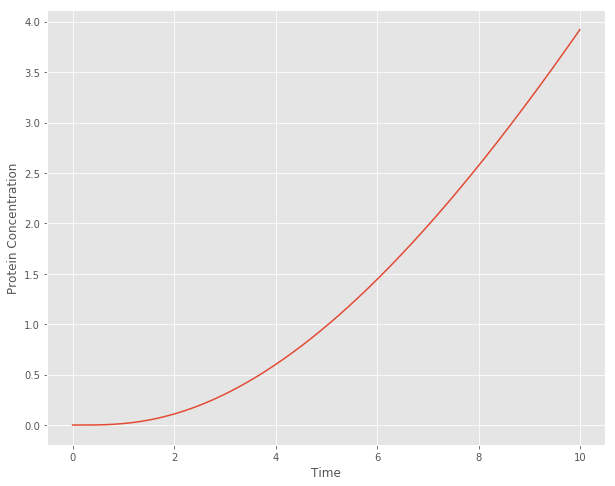

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy as sp
import math

bRev = 1.0
bFor = 1.0
dRev = 1.0
dFor = 1.0
ktl = 1.0
kun = 1.0

def massActionModel(y, t):
    T7Pol = y[0]
    DNA = y[1]
    NTP = y[2]
    T7PolDNA = y[3]
    T7PolDNANTP = y[4]
    mRNA = y[5]
    protein = y[6]
    
    one = bRev*T7PolDNA - bFor*T7Pol*DNA + kun*T7PolDNANTP
    two = bRev*T7PolDNA - bFor*T7Pol*DNA + kun*T7PolDNANTP
    three = dRev*T7PolDNANTP - dFor*T7PolDNA*NTP
    four = bFor*T7Pol*DNA - bRev*T7PolDNA + dRev*T7PolDNANTP - dFor*T7PolDNA*NTP
    five = dFor*T7PolDNA*NTP - dRev*T7PolDNANTP - kun*T7PolDNANTP
    six = kun*T7PolDNANTP
    seven = ktl*mRNA
    
    return [(one), (two), (three), (four), (five), (six), (seven)]

plt.style.use("ggplot") # GGplot is awesome.
plt.rcParams['figure.figsize'] = (10.0, 8.0)

t = np.arange (0, 10, 0.01)
y = []
y = odeint(massActionModel, (1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0), t)

plt.plot(t,y[:, 6])

plt.xlabel("Time")
plt.ylabel("Protein Concentration")

plt.show()

